In [36]:
library(readxl)
library(tidyverse)
library(haven)
library(dplyr)
library(scales)
library(stargazer)
library(car)
library(GGally)
library(ggplot2)
library(ggcorrplot)

Warning message:
"程辑包'ggcorrplot'是用R版本4.3.3 来建造的"


In [19]:
url <- "https://raw.githubusercontent.com/Speculatorrr/ECON326/d0e554d0459664e17c4489ca8c08f9e1f0e2406c/Student%20Performance%20Survey%20-%20March%202025.xlsx"
temp_file <- tempfile(fileext = ".xlsx")
download.file(url, temp_file, mode = "wb")
df <- read_excel(temp_file)

In [31]:
colnames(df) <- c(
    "GPA_percent", "GPA_scale", "single_study", "all_study", "exam_prepare",
    "course_take", "course_preference", "AI_use", "AI_help", "review",
    "hw", "sport", "club", "volunteer", "friend",
    "family", "student", "tuition", "aid", "aid_coverage",
    "job", "work", "finance", "sleep", "media",
    "screen", "anxiety", "commute", "transport", "course_mode",
    "future_work","future_edu", "confidence", "career", "faculty", 
    "ethnicity", "year")

1. `GPA_percent`: What is your current cumulative GPA (on a percentage scale)? Example: 75%  
2. `GPA_scale`: What is your current GPA on a 4.0 scale (if known)? Example: 3.51  
3. `single_study`: How many hours per week do you study for this course? Example: 9  
4. `all_study`: How many total hours per week do you study across all your courses? Example: 21  
5. `exam_prepare`: How many hours do you spend preparing for exams (excluding regular coursework)? Example: 8  
6. `course_take`: How many courses do you take on average per term? Example: 4  
7. `course_preference`: Do you prefer courses that focus more on practical applications or theoretical concepts?  
8. `AI_use`: How many hours per week do you use ChatGPT or other LLM or AI tools for studying or assignments? Example: 12  
9. `AI_help`: How do you feel AI tools like ChatGPT impact your learning? (5 = Strongly helps, 1 = Strongly harms)  
10. `review`: How much time per week do you spend on reviewing lecture slides and course materials? Example: 6  
11. `hw`: How much time per week do you spend on assignments, problem sets, and practice exercises? Example: 5  
12. `sport`: How many hours per week do you spend on sports or fitness activities? Example: 4  
13. `club`: How many hours per week do you spend on student clubs or societies? Example: 5  
14. `volunteer`: How many hours per week do you spend on volunteering or community service? Example: 3  
15. `friend`: How many hours per week do you spend socializing with friends? Example: 6  
16. `family`: How many hours per week do you spend socializing with family (online and in-person together)? Example: 8  
17. `student`: Are you an international, domestic, or exchange student? If you are an exchange student, just choose "Exchange" below.  
18. `tuition`: What is your average tuition fee per course? Example: 3200  
19. `aid`: Do you receive any scholarships or financial aid?  
20. `aid_coverage`: If you receive scholarships or financial aid, what percentage of your tuition does it cover? Example: 50%. If you do not get a scholarship or financial aid, just enter "0".  
21. `job`: Do you currently have a job while studying?  
22. `work`: How many hours per week do you work? Example: 12. Put "0" if you are not working.  
23. `finance`: Do you feel that your financial situation affects your academic performance? (5 = Significantly affects, 1 = No impact at all)  
24. `sleep`: How many hours of sleep do you get on an average night? Example: 6  
25. `media`: How much time do you spend daily on social media (in minutes)? Example: 200  
26. `screen`: How much time do you spend daily on screens (computer, phone, TV) for non-academic purposes (in minutes)? Example: 120  
27. `anxiety`: How often do you feel depressed or anxious these days? (5 = Very frequently, 1 = Never)  
28. `commute`: How long is your commute to campus (one way, in minutes)? Example: 25. If you live on campus, just write the walk time on average in minutes to your classes.  
29. `transport`: What is your primary mode of transportation to campus?  
30. `course_mode`: Do you prefer taking online courses, in-person courses, or a hybrid of both?
30. `future_work`: How often do you think about your future employment or career prospects? (5 = Constantly, 1 = Never)  
31. `future_edu`: Do you plan to pursue further education (graduate school, professional certification, etc.)?  
32. `confidence`: How confident are you in securing a job related to your field of study after graduation? (5 = Very confident, 1 = Not confident at all)  
33. `career`: Which career path are you most likely to pursue after graduation? (Select the option that best matches your current career goal)  
34. `faculty`: Which faculty are you in? (Select the faculty that best matches your program of study). Faculty of Arts is very vast so please google or use AI.  
35. `ethnicity`: What is your ethnicity?  
36. `year`: Which year are you in at your undergraduate program at UBC? (1 = First Year, 5 = Fifth Year or beyond)

In [32]:
df$GPA_percent <- as.numeric(gsub("%", "", df$GPA_percent))
df$aid_coverage <- as.numeric(gsub("%", "", df$aid_coverage))

# Convert to factors
df[] <- lapply(df, function(x) if (is.character(x)) as.factor(x) else x)

# Convert to numeric
df[, c(1:6, 8:16, 18, 20, 22:28, 31, 33, 37)] <- lapply(df[, c(1:6, 8:16, 18, 20, 22:28, 31, 33, 37)], as.numeric)

df <- drop_na(df)
head(df)

GPA_percent,GPA_scale,single_study,all_study,exam_prepare,course_take,course_preference,AI_use,AI_help,review,⋯,commute,transport,course_mode,future_work,future_edu,confidence,career,faculty,ethnicity,year
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>
86.0,50,24,28,24,11,More practical applications,6,5,10,⋯,18,Public transit,1,3,3,3,"Finance, Banking, or Investment",Faculty of Arts,2,3
78.6,35,5,38,26,12,More practical applications,14,5,5,⋯,15,Walking,3,5,2,1,"Finance, Banking, or Investment",Faculty of Commerce and Business Administration (Sauder School of Business),2,3
63.0,10,25,18,36,7,More practical applications,9,5,17,⋯,18,Public transit,3,5,3,5,"Finance, Banking, or Investment",Faculty of Arts,2,1
73.0,82,14,7,18,10,More practical applications,32,1,10,⋯,15,Walking,2,5,2,5,Marketing or Communications,Faculty of Arts,2,3
74.2,31,5,5,27,7,More theoretical concepts,15,5,14,⋯,5,Walking,2,4,2,5,Date Science or AI,Faculty of Arts,2,3
90.1,55,17,28,18,9,More practical applications,8,5,18,⋯,15,Walking,2,3,1,4,Entrepreneurship or Startups,Faculty of Arts,2,3


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwid

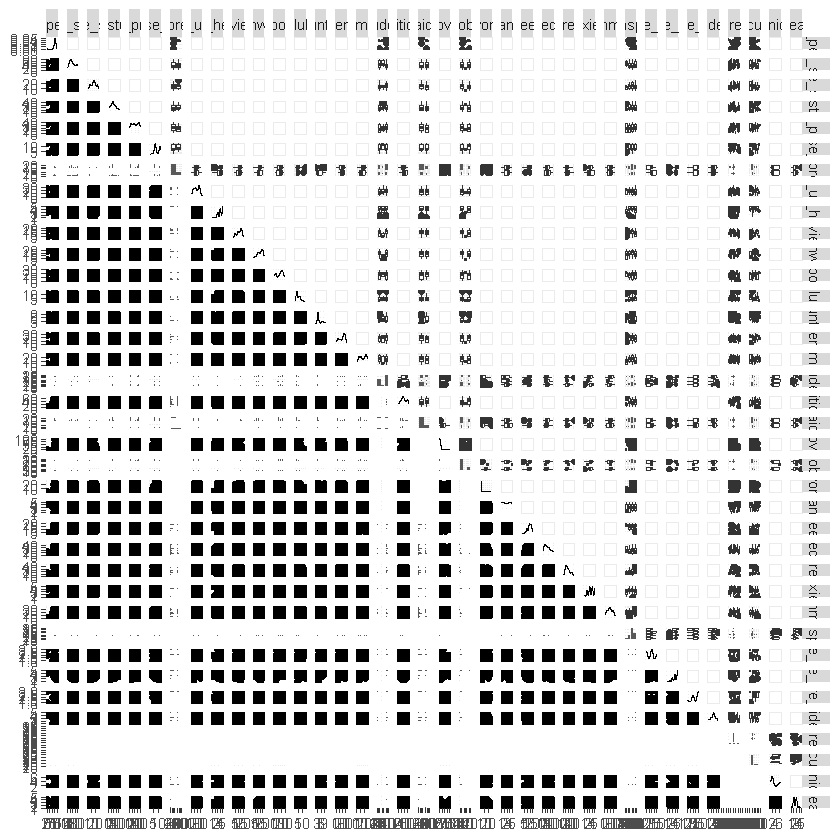

In [34]:
ggpairs(df)

In [5]:
selected_df <- df[, c(1,2,18,20,23)]

,GPA_percent,GPA_scale,single_study,all_study,exam_prepare,course_take,AI_use,AI_help,review,hw,⋯,work,finance,sleep,media,screen,anxiety,commute,future_work,confidence,year
GPA_percent,1.00000000,0.33287596,5.556617e-02,0.123019715,1.053802e-01,0.24624677,0.0969781972,0.011347803,-0.06081583,0.0844311932,⋯,0.0717995206,-0.179572504,0.4383547085,0.185538799,0.17276743,-0.162239070,0.180091472,-0.068385827,-0.087392225,1.283637e-01
GPA_scale,0.33287596,1.00000000,-1.060211e-01,0.100095678,3.844131e-02,0.21542717,-0.1060946539,0.042055626,-0.07712054,-0.0710645339,⋯,-0.0226032164,-0.106180970,0.1764551937,0.053391354,0.04271527,-0.174204701,-0.030906804,-0.027726876,0.117131193,3.887735e-02
single_study,0.05556617,-0.10602114,1.000000e+00,0.010566736,5.375029e-02,0.10955987,0.1967457107,0.093517117,0.34541264,0.3024951460,⋯,-0.1493506194,0.043051942,-0.0424996222,-0.006012317,-0.03669773,0.161022456,0.112489906,0.039913629,-0.085672489,3.425343e-05
all_study,0.12301972,0.10009568,1.056674e-02,1.000000000,5.495794e-02,0.15252541,0.1419466307,0.089895837,-0.05600431,-0.0048816382,⋯,-0.0362017308,0.046610527,0.1160288509,0.018744665,-0.04526919,0.040382808,0.056539204,0.075822753,0.033272196,-2.804747e-02
exam_prepare,0.10538017,0.03844131,5.375029e-02,0.054957942,1.000000e+00,0.05644575,-0.0181095977,0.106404043,-0.05109609,-0.0197596371,⋯,-0.0514989746,-0.182071099,0.0348967877,0.086966018,0.02596921,-0.035324710,-0.007464517,-0.119385986,0.041614458,8.934844e-05
course_take,0.24624677,0.21542717,1.095599e-01,0.152525408,5.644575e-02,1.00000000,0.1222616101,0.113215899,-0.03886092,0.0883878224,⋯,0.1243346421,-0.010471522,0.1754728254,-0.046070374,0.03674730,-0.029117456,0.057266675,-0.057232738,0.077404939,-7.862818e-02
AI_use,0.09697820,-0.10609465,1.967457e-01,0.141946631,-1.810960e-02,0.12226161,1.0000000000,0.157435804,0.19576912,0.0816263829,⋯,-0.0571258813,0.004424490,0.0004424497,-0.054987637,0.02103909,0.044364083,0.001044349,0.038786264,-0.047495074,7.107560e-02
AI_help,0.01134780,0.04205563,9.351712e-02,0.089895837,1.064040e-01,0.11321590,0.1574358036,1.000000000,0.11957356,0.1632527148,⋯,0.0090853636,0.050786592,0.0256667963,-0.031530312,-0.10574040,0.033691500,-0.086260798,0.038688510,0.060770241,3.367724e-02
review,-0.06081583,-0.07712054,3.454126e-01,-0.056004308,-5.109609e-02,-0.03886092,0.1957691232,0.119573556,1.00000000,0.3969615646,⋯,-0.1186501992,0.124613789,-0.0326331555,-0.118899516,-0.05276660,0.194493095,0.080074397,0.059256539,-0.076273742,-7.209203e-02
hw,0.08443119,-0.07106453,3.024951e-01,-0.004881638,-1.975964e-02,0.08838782,0.0816263829,0.163252715,0.39696156,1.0000000000,⋯,0.0009396768,-0.013588015,0.0375858513,-0.104127112,-0.06963160,0.034415792,0.061820398,-0.110166880,-0.025362764,-4.021132e-02


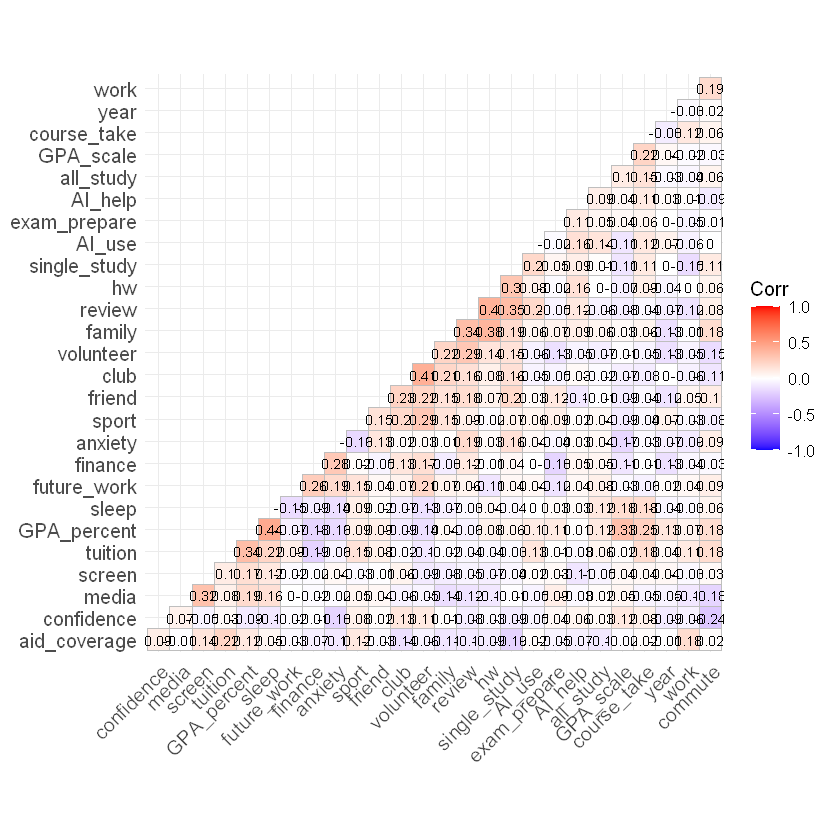

In [41]:
numeric_vars <- df[, c(1:6, 8:16, 18, 20, 22:28, 31, 33, 37)]

cor_matrix <- cor(numeric_vars, use = "pairwise.complete.obs")

cor_plot <- ggcorrplot(cor_matrix, hc.order = TRUE, type = "lower",
           lab = TRUE, lab_size = 3, colors = c("blue", "white", "red")) 


cor_plot <- cor_plot +
  theme(
    text = element_text(size = 12),       
    axis.text = element_text(size = 10),  
    plot.title = element_text(size = 14)  
  )
cor_matrix
cor_plot